In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries Loaded")

Libraries Loaded


In [13]:
ufo = pd.read_csv('ufo_sightings.csv', low_memory=False)

In [14]:
ufo.head()

datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

  duration (seconds) duration (hours/min)  \
0               2700           45 minutes   
1               7200              1-2 hrs   
2                 20           20 seconds   
3                 20             1/2 hour   
4                900           15 minutes   

                                            comments date posted   latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.883056   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005  29.384210   
2  Green/Orange circular disc over Chester&#44 En...   1/21/2008  53.200000   
3  My older brother and twin sister were leaving ...   1/17/2004  28.978333   
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004  21.418056   

   longitude   
0  -97.941111  
1  -98.581082  
2   -2.916667  
3  -96.645833  
4 -157.803611

In [15]:
ufo.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [16]:
# examining null values
nulvals = ufo.isnull().sum()
nulpct = (nulvals / len(ufo))*100
print(' Null Values (% of entries):')
print(round(nulpct.sort_values(ascending=False),2))

 Null Values (% of entries):
country                 12.04
state                    7.22
shape                    2.41
comments                 0.02
longitude                0.00
latitude                 0.00
date posted              0.00
duration (hours/min)     0.00
duration (seconds)       0.00
city                     0.00
datetime                 0.00
dtype: float64


In [17]:
## EDA adapted from: Hakeem Frank

In [18]:
# CLEAN Null values from dataset
ufo = pd.read_csv('ufo_sightings.csv', 
                        low_memory = False, 
                        na_values = ['UNKNOWN','UNK'], 
                        na_filter = True, 
                        skip_blank_lines = True)  # load dataset without NA values

# Choose columns to work with based on our initial questions
ufo_subcols = ['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
        'comments', 'date posted', 'latitude',
       'longitude ']

# After tidying data and choosing what to work with, create dataframe to work with
ufo = pd.DataFrame(data=ufo, columns=ufo_subcols)

# ...drop null values
ufo = ufo.dropna(thresh=8)

#...reset the index
ufo = ufo.reset_index(drop=True)


In [19]:
# EXTRACT LATITUDES #
ufo['latitude'] = pd.to_numeric(ufo['latitude'],errors = 'coerce')  # latitudes as numerics
ufo['longitude '] = pd.to_numeric(ufo['longitude '], errors='coerce')

# CHANGE VARIABLES UFO_DATE IN SCRIPT 1-1-18
ufo_date = ufo.datetime.str.replace('24:00', '00:00')  # clean illegal values
ufo_date = pd.to_datetime(ufo_date, format='%m/%d/%Y %H:%M')  # now in datetime

ufo['datetime'] = ufo.datetime.str.replace('24:00', '00:00')
ufo['datetime'] = pd.to_datetime(ufo['datetime'], format='%m/%d/%Y %H:%M')

In [20]:
ufo.shape

(80257, 10)

C:\Users\jfrui\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


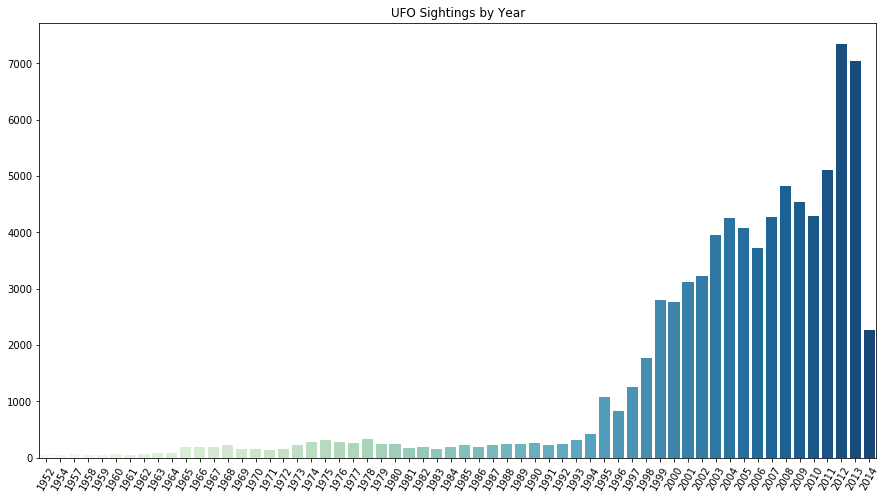

In [21]:
# Trends in UFO sightings by year

ufo_yr = ufo_date.dt.year  # series with the year exclusively

## Set axes ##
years_data = ufo_yr.value_counts()
years_index = years_data.index  # x ticks
years_values = years_data.get_values()

## Create Bar Plot ##
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('UFO Sightings by Year')

years_plot = sns.barplot(x=years_index[:60],y=years_values[:60], palette = "GnBu")

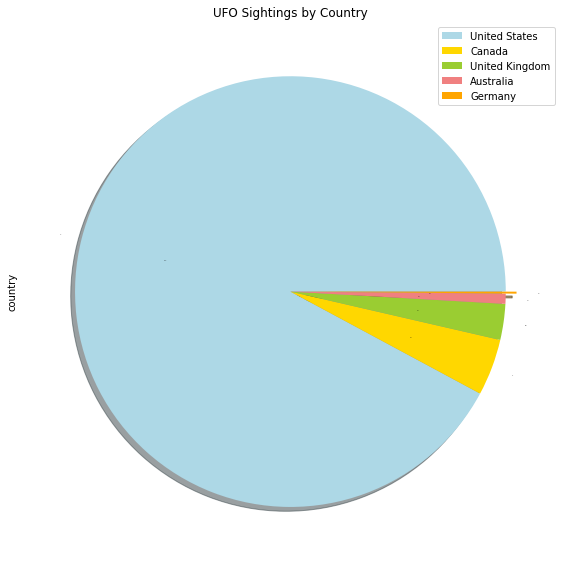

In [22]:
# What countries have the most reported sightings?

country_sightings = ufo.country.value_counts()  # num ufo sightings per country 

explode = (0, 0, 0, 0., 0.05)
colors = ['lightblue','gold','yellowgreen','lightcoral','orange']
country_sightings.plot(kind = 'pie', fontsize = 0, title='UFO Sightings by Country', colors=colors,
                       autopct='%1.1f%%',shadow=True, explode=explode,figsize=(8,8))
plt.legend(labels=['United States','Canada','United Kingdom','Australia','Germany'], loc="best")
plt.tight_layout()

In [23]:
# Looking at the numeric distribution of sightings around the world
ufo['country'].value_counts().head(10)

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

C:\Users\jfrui\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


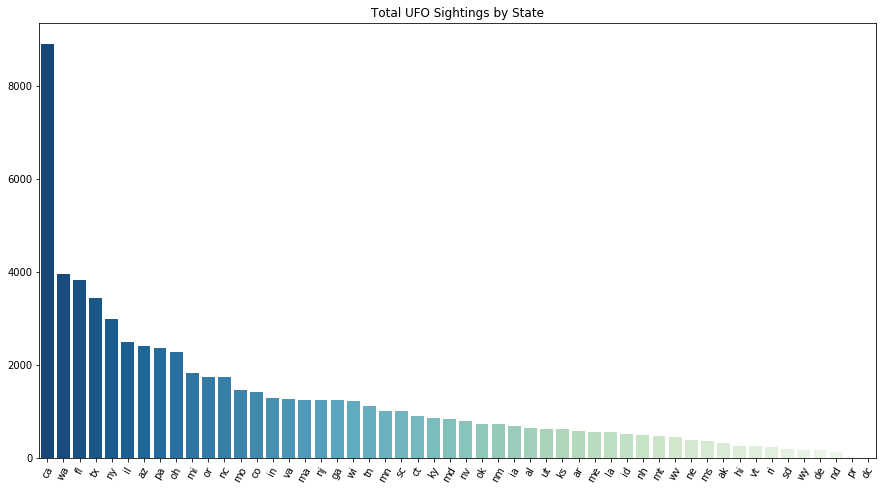

Top 10 States for Total UFO Sightings:
ca    8912
wa    3966
fl    3835
tx    3447
ny    2980
il    2499
az    2414
pa    2366
oh    2275
mi    1836
Name: state, dtype: int64


In [24]:
# Filter US Values to analyze US state sightings #
usa_filter = ufo['country']=='us'  # filter non-usa country
us_data = ufo[usa_filter]  # DF ufo_data of only US sightings - includes puerto rico and dc

# Get x and y axes for states bar viz #
states_sights = us_data.state.value_counts()  # State Data
state_names = states_sights.index  # x axis ticks
state_freq = states_sights.get_values()  # y axis values

# States Frequency Pareto Chart #
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('Total UFO Sightings by State')
states_plot = sns.barplot(x=state_names,y=state_freq, palette="GnBu_r")
plt.show()
print('Top 10 States for Total UFO Sightings:')
print(states_sights[:10].sort_values(ascending=False))

C:\Users\jfrui\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.


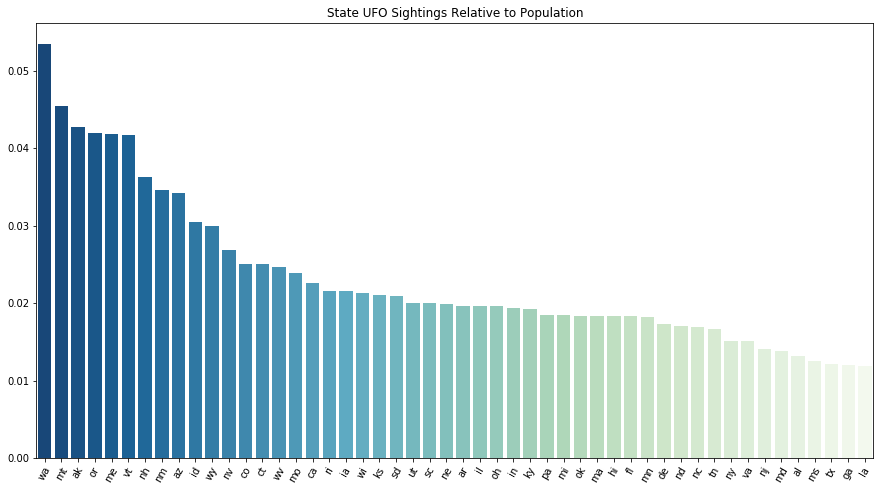

States with Highest Proportion of UFO Sightings:
wa    0.05
mt    0.05
ak    0.04
or    0.04
me    0.04
vt    0.04
nh    0.04
nm    0.03
az    0.03
id    0.03
dtype: float64


In [25]:
# Looking at sightings relative to population of each state. 
# State population data pulled from https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population

statespop = {'al':4872725.,'ak':746079.,'az':7044577.,'ar':2998643.,'ca':39506094.,
            'co':5632271.,'ct':3568174.,'de':960054.,'dc':691963.,'fl':20979964.,
            'ga':10421344.,'hi':1431957.,'id':1713452.,'il':12764031.,'in':6653338.,
            'ia':3147389.,'ks':2907857.,'ky':4449337.,'la':4694372.,'me':1333505.,
            'md':6037911.,'ma':6839318.,'mi':9938885.,'mn':5557469.,'ms':2988062.,
            'mo':6109796.,'mt':1052967.,'ne':1920467.,'nv':2996358,'nh':1339479.,
            'nj':8953517.,'nm':2081702.,'ny':19743395.,'nc':10258390.,'nd':759069.,
            'oh':11623656.,'ok':3939708.,'or':4162296.,'pa':12776550.,'pr':3661538.,
            'ri':1057245.,'sc':5027404.,'sd':872989.,'tn':6707332.,'tx':28295553.,
            'ut':3111802.,'vt':623100.,'va':8456029.,'wa':7415710.,'wv':1821151.,
            'wi':5789525.,'wy':584447.} 
states_pop = pd.Series(statespop)  # turn dict into series type


state_propsight = (states_sights / states_pop)*100 # prop data series for viz, scaled for style
state_propsight = state_propsight.sort_values(ascending=False) 

# Visualize it
us_namesp = state_propsight.index  # x ticks
us_sightsp = state_propsight.get_values()  # y values

plt.figure(figsize=(15,8))
plt.xticks(rotation=60)
plt.title('State UFO Sightings Relative to Population')
sns.barplot(x = us_namesp[:50], y = us_sightsp[:50], palette="GnBu_r")
plt.show()
print('States with Highest Proportion of UFO Sightings:')
print(round(state_propsight[:10],2))

C:\Users\jfrui\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """


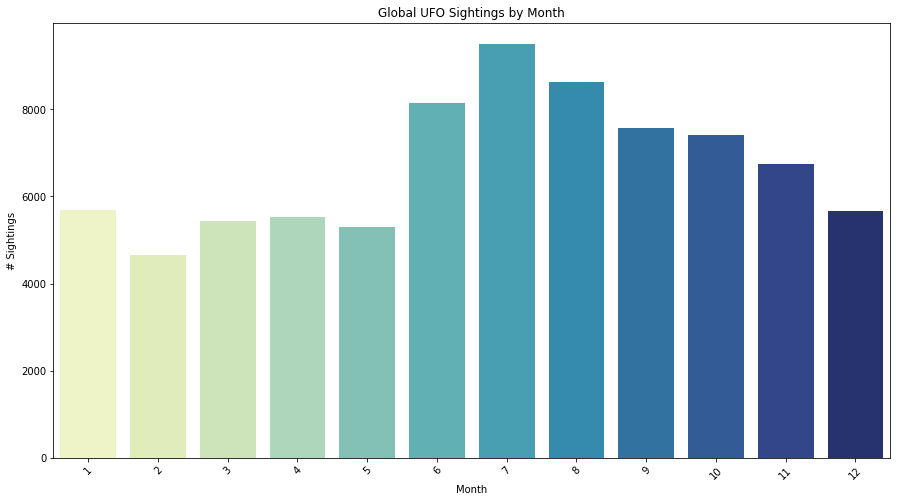

In [26]:
# Looking at trends in seasonality 

m_cts = (ufo['datetime'].dt.month.value_counts()).sort_index()
m_ctsx = m_cts.index
m_ctsy = m_cts.get_values()
f, ax = plt.subplots(figsize=(15,8))

sns.barplot(x=m_ctsx, y=m_ctsy, palette="YlGnBu")
ax.set_title('Global UFO Sightings by Month')
ax.set_xlabel('Month')
ax.set_ylabel('# Sightings')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Add Season Column to ufo_date #
# Given a datetime, return the season that it's in #
ufo_datem = ufo_date.dt.month
spring = range(5,7)
summer = range(7,10)
fall = range(10,12)
seasons = []

for st_date in ufo_datem:
    # Conversion Process # 
    if st_date in spring:
        seasons.append('Spring')
    elif st_date in summer:
        seasons.append('Summer')
    elif st_date in fall:
        seasons.append('Fall')
    else:
        seasons.append('Winter')

In [28]:
ufo['season'] = pd.Series(seasons, index=ufo.index)

In [29]:
# Add Hemisphere Column to ufo_date #
hemis = []
for st_loc in ufo['latitude']:
    if st_loc >= 0 :
        hemis.append('Northern Hemisphere')
    else:
        hemis.append('Southern Hemisphere')

In [30]:
ufo['hemisphere'] = (pd.Series(hemis, index=ufo.index)).astype('category')

In [31]:
ufo['season'].value_counts()

Winter    26965
Summer    25719
Fall      14148
Spring    13425
Name: season, dtype: int64

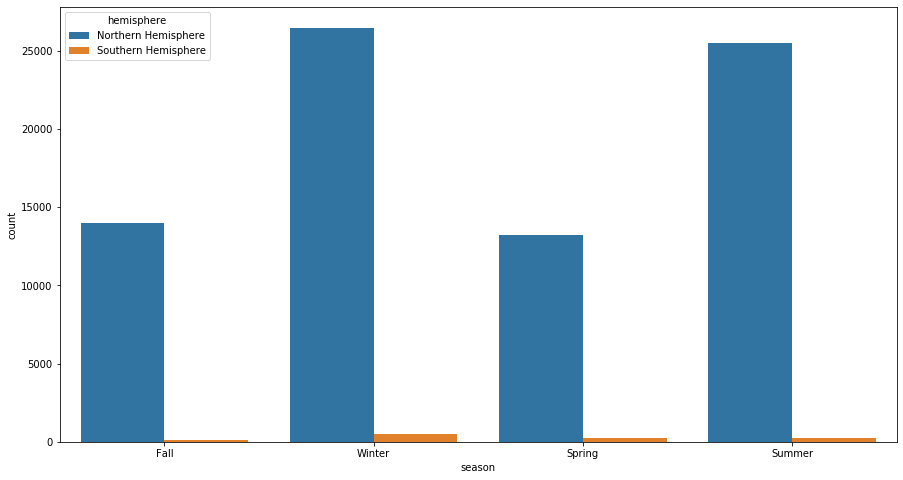

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(x='season', hue='hemisphere', data=ufo)

In [33]:
resp_n = ufo[ufo['hemisphere'] == 'Northern Hemisphere']
resp_s = ufo[ufo['hemisphere'] == 'Southern Hemisphere']

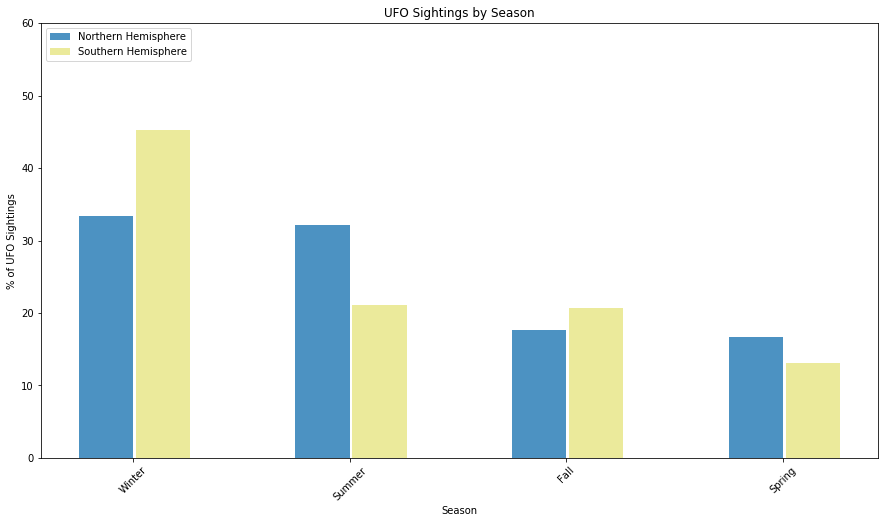

Northern Hemisphere:
 Winter    33.441099
Summer    32.199687
Fall      17.690443
Spring    16.668771
Name: season, dtype: float64
Southern Hemisphere:
 Winter    45.200373
Spring    21.062442
Summer    20.689655
Fall      13.047530
Name: season, dtype: float64


In [34]:
nsperc = resp_n['season'].value_counts() / len(resp_n) * 100
ssperc = resp_s['season'].value_counts() / len(resp_s) * 100

pos = list(range(len(nsperc)))
width = 0.25
fig, ax = plt.subplots(figsize = (15,8))

plt.bar(pos, nsperc, width, alpha = .7, color='#0064A9')
plt.bar([p + width*1.05 for p in pos], ssperc, width, alpha = .65, color='#E1E066')

ax.set_title('UFO Sightings by Season')
ax.set_xlabel('Season')
ax.set_ylabel('% of UFO Sightings')
ax.set_xticks([p + .5 * width for p in pos])
ax.set_xticklabels(nsperc.index)
plt.xticks(rotation=45)

plt.ylim([0, 60])
plt.legend(['Northern Hemisphere','Southern Hemisphere'], loc='upper left')
plt.show()
print('Northern Hemisphere:\n', nsperc)
print('Southern Hemisphere:\n',ssperc)

C:\Users\jfrui\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  if __name__ == '__main__':
C:\Users\jfrui\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


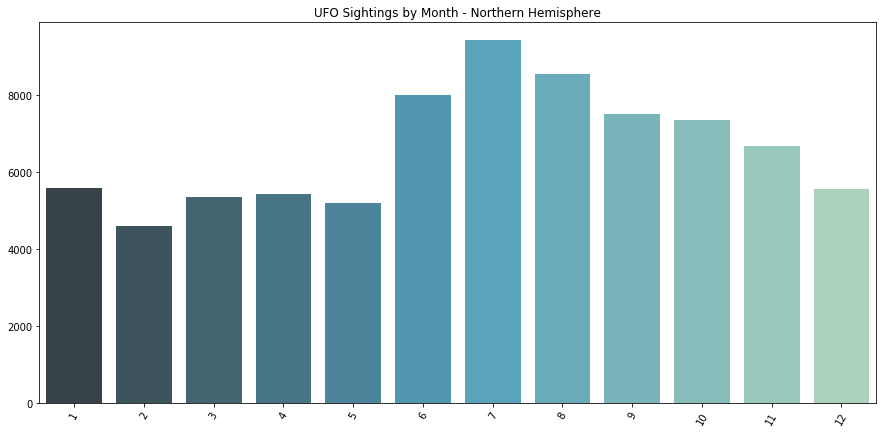

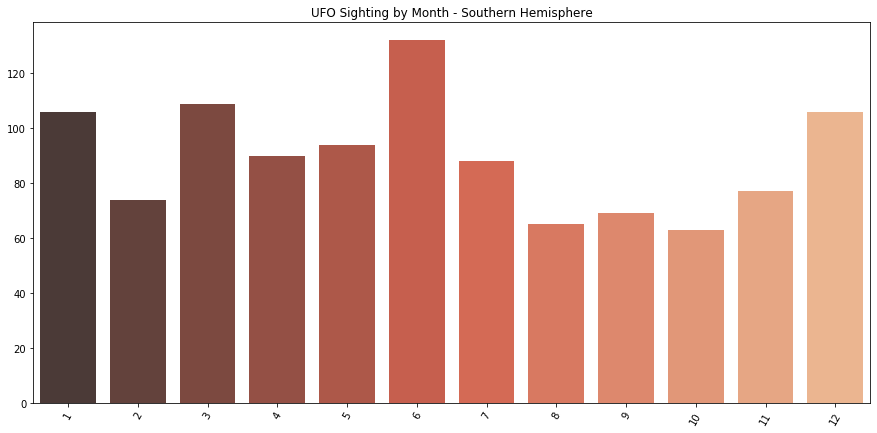

Top Months for UFO Sightings in N. Hemishpere:
7     9424
8     8562
6     8003
9     7511
10    7343
11    6665
Name: datetime, dtype: int64
Top Months for UFO Sightings in S. Hemisphere:
6     132
3     109
12    106
1     106
5      94
4      90
Name: datetime, dtype: int64


In [35]:
# Looking at top months for sightings in both hemispheres

n_mon = resp_n['datetime'].dt.month
s_mon = resp_s['datetime'].dt.month

# N.MONTH #
monn_cts = n_mon.value_counts().sort_index()
monn_in = monn_cts.index 
monn_val = monn_cts.get_values()

# S.MONTH #
mons_cts = s_mon.value_counts().sort_index()
mons_in = mons_cts.index
mons_val = mons_cts.get_values()

plt.figure(figsize=(15,7))
plt.xticks(rotation = 60)
plt.title('UFO Sightings by Month - Northern Hemisphere')
sns.barplot(x=monn_in,y=monn_val, palette="GnBu_d")
plt.show()

plt.figure(figsize=(15,7))
plt.xticks(rotation = 60)
plt.title('UFO Sighting by Month - Southern Hemisphere')
sns.barplot(x=mons_in, y=mons_val, palette="OrRd_d")
plt.show()

print('Top Months for UFO Sightings in N. Hemishpere:')
print(n_mon.value_counts()[:6])
print('Top Months for UFO Sightings in S. Hemisphere:')
print(s_mon.value_counts()[:6])

C:\Users\jfrui\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


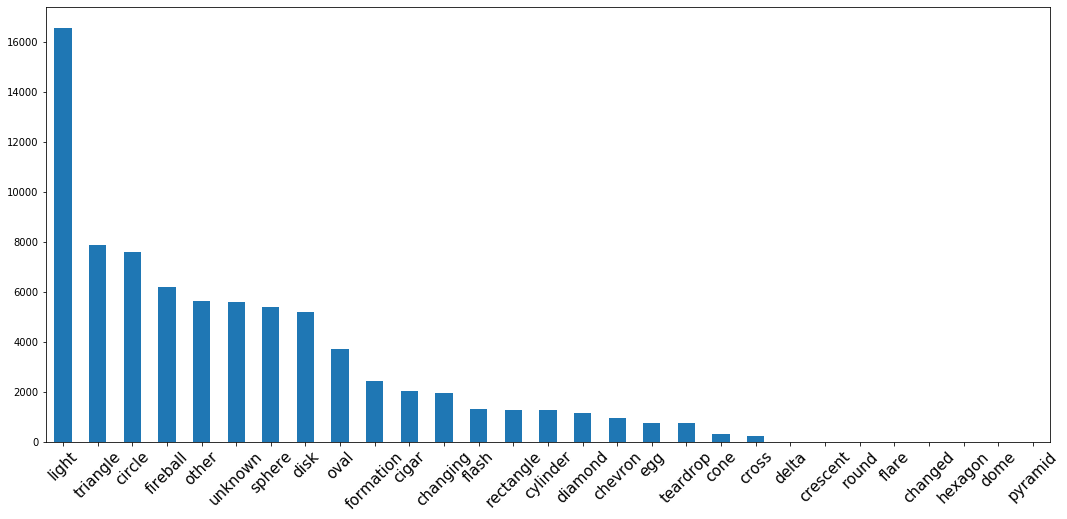

In [36]:
# Looking at most common shape reported
plt.subplots(figsize=(18,8))

ufo['shape'].value_counts().plot('bar')
plt.xticks(rotation=45, fontsize=15)
plt.show()

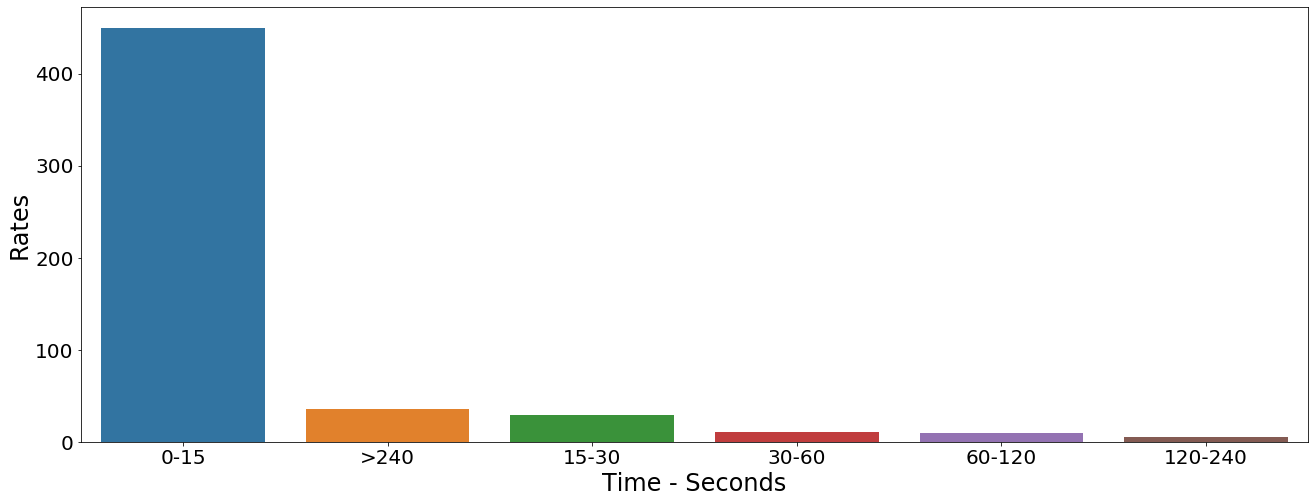

In [37]:
# Examining Duration of Sightings

plt.subplots(figsize=(22,8))
duration_sec = [i for i in ufo["duration (seconds)"].value_counts()]
duration_sec_list = []
for i in duration_sec:
    if i in range(0,16):
        duration_sec_list.append("0-15")
    if i in range(15,31):
        duration_sec_list.append("15-30")
    if i in range(31,61):
        duration_sec_list.append("30-60")
    if i in range(60,121):
        duration_sec_list.append("60-120")
    if i in range(120,241):
        duration_sec_list.append("120-240")
    if i > 240:
        duration_sec_list.append(">240")
duration_sec_list = pd.Series(duration_sec_list)
di = duration_sec_list.value_counts().index
dv = duration_sec_list.value_counts().values
sns.barplot(di,dv)

plt.xlabel("Time - Seconds",fontsize=24)
plt.xticks(fontsize=20)
plt.ylabel("Rates",fontsize=24)
plt.yticks(fontsize=20)

plt.show()

### EDA gives us some great insight into the data. It shows that more sightings happen in the northern hemisphere during the summer months than any other time. It also shows that the United States reports the most sightings based on the data provided but this could be skewed due to the fact that the reporting organization is located within the United States.

# DBSCAN Clustering of longitude and latitude

In [1]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt 

In [2]:
ufo_data = pd.read_csv('scrubbed.csv')

# Remove spaces from column names
ufo_data.columns = ufo_data.columns.to_series().apply(lambda x: x.strip())

# features that we are going to consider
lat_long_features = ['latitude', 'longitude']

# Reducing the data set to 70000 rows and above mentioned columns
ufo_data = ufo_data.loc[1:70000, lat_long_features]

ufo_data.shape

C:\Users\jfrui\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(70000, 2)

In [3]:
X = []
data_lat_long = []

# Method to check if a number can be converted to Float
def is_float(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
for i, row in ufo_data.iterrows():
    lat = row['latitude']
    long = row['longitude']
#     Making sure lat and long do not contain any bad characters
    if is_float(lat) and is_float(long):
        data_lat_long.append([float(long), float(lat)])
X = np.array(data_lat_long)

In [4]:
from sklearn.cluster import DBSCAN 
epsilon = 10
minimumSamples = 30
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [5]:
# Create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# Making the core samples of high density true
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [6]:
# If there is -1 in labels, it means its noise
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

9

In [7]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

In [8]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

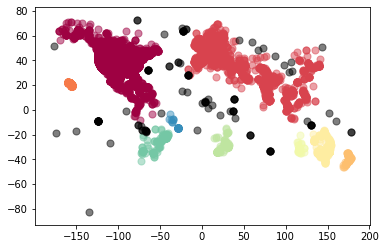

In [9]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

# Text Mining using WordCloud

In [38]:
ufo_reports = ufo[['comments']]
ufo_reports

comments
0      This event took place in early fall around 194...
1      1949 Lackland AFB&#44 TX.  Lights racing acros...
2      Green/Orange circular disc over Chester&#44 En...
3      My older brother and twin sister were leaving ...
4      AS a Marine 1st Lt. flying an FJ4B fighter/att...
...                                                  ...
80252  Round from the distance/slowly changing colors...
80253  Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...
80254                                       Napa UFO&#44
80255  Saw a five gold lit cicular craft moving fastl...
80256  2 witnesses 2  miles apart&#44 Red &amp; White...

[80257 rows x 1 columns]

In [39]:
ufo_reports.columns

Index(['comments'], dtype='object')

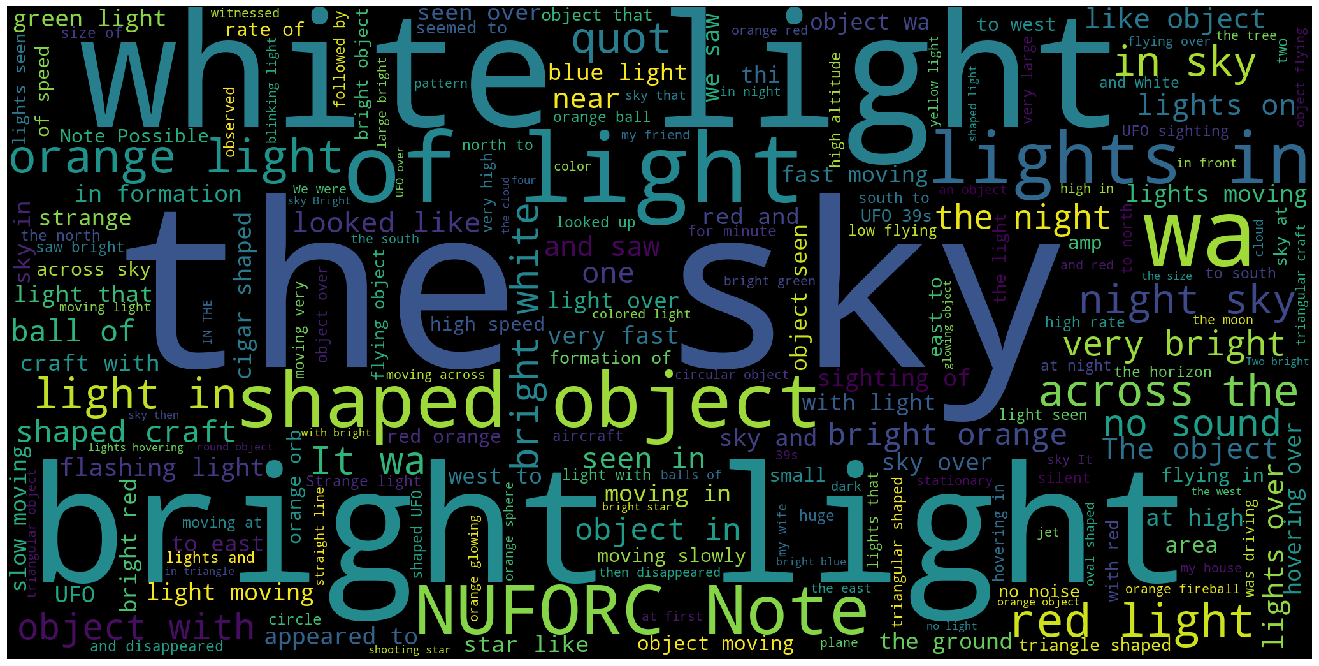

In [40]:
# Most common words 
from wordcloud import WordCloud

words = [i for i in ufo_reports.comments.dropna()]
    
words = " ".join(words)

plt.subplots(figsize=(28,12))
wordcloud = WordCloud(
                          background_color='black',
                          width=2048,
                          height=1024
                          ).generate(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

# Time Series Analysis

Adapted from Ricardo Dinis

In [1]:
import numpy as np
import pandas as pd
from scipy import signal
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa as tsa 
import statsmodels.api as sm
import plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

In [2]:
ufo_data = pd.read_csv('scrubbed.csv', usecols=[0, 4, 5, 7], low_memory=False)
# Converting format of datetime variable
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], errors='coerce')

In [3]:
df1 = ufo_data

In [4]:
#Copy the dataframe, fill in NA values as 0, and convert to integer values
df1.insert(1, 'year', df1['datetime'].dt.year)
df1['year'] = df1['year'].fillna(0).astype(int)
df1.insert(1, 'month', df1['datetime'].dt.month)
df1['month'] = df1['month'].fillna(0).astype(int)
df1.insert(1, 'day', df1['datetime'].dt.month)
df1['day'] = df1['day'].fillna(0).astype(int)

In [5]:
# Format and group UFO rows by month, cut missing data from end
df1t = df1[(df1['datetime'] >= '1996-01-01') & (df1['datetime'] <= '2013-01-01')]
daily = df1t.set_index('datetime').groupby(pd.Grouper(freq='D'))['comments'].count()
monthly = df1t.set_index('datetime').groupby(pd.Grouper(freq='M'))['comments'].count()
yearly = df1t.set_index('datetime').groupby(pd.Grouper(freq='A'))['comments'].count()
daily.sort_index(ascending=True)
monthly.sort_index(ascending=True)
yearly.sort_index(ascending=True)

datetime
1996-12-31     822
1997-12-31    1242
1998-12-31    1739
1999-12-31    2788
2000-12-31    2752
2001-12-31    3108
2002-12-31    3210
2003-12-31    3935
2004-12-31    4218
2005-12-31    4039
2006-12-31    3681
2007-12-31    4243
2008-12-31    4777
2009-12-31    4508
2010-12-31    4258
2011-12-31    5076
2012-12-31    7308
2013-12-31       5
Freq: A-DEC, Name: comments, dtype: int64

In [6]:
# reset index
mm = monthly.reset_index()
yy = yearly.reset_index()
dd = daily.reset_index()
Ym = mm.comments
Yy = yy.comments
Yd = dd.comments

In [7]:
Y = monthly

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    trace01 = {'x': timeseries.index, 'y': timeseries, 'type': 'scatter', 'name': 'Original'}
    trace02 = {'x': rolmean.index, 'y': rolmean, 'type': 'scatter', 'name': 'Rolling mean'}
    trace03 = {'x': rolstd.index, 'y': rolstd, 'type': 'scatter', 'name': 'Rolling Std' }

    
    layout1 = go.Layout(
         title = 'Rolling Mean & Standard Deviation',
         #marker=dict(colorscale="Viridis"),
         xaxis = dict(
            rangeslider = dict(thickness = 0.05),
            showline = True,
         ),
         yaxis = dict(
             #range = [0, 10000],
             showline = True,
             showgrid = False,
        )
        )

    data = [trace01,trace02,trace03]
    fig = dict(data=data, layout=layout1)
    iplot(fig)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [9]:
test_stationarity(Y)

Results of Dickey-Fuller Test:
Test Statistic                  -1.124820
p-value                          0.705073
#Lags Used                      14.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64


In [10]:
Y_log = np.log(Y)
Y_log
Y_log = Y_log.replace([np.inf, -np.inf], 0)
Y_log.dropna(inplace=True)
moving_avg = Y_log.rolling(window=12,center=False).mean()
test_stationarity(Y_log)

Results of Dickey-Fuller Test:
Test Statistic                  -2.963695
p-value                          0.038427
#Lags Used                      10.000000
Number of Observations Used    194.000000
Critical Value (1%)             -3.464515
Critical Value (5%)             -2.876556
Critical Value (10%)            -2.574775
dtype: float64


In [11]:
Y_log_moving_avg_diff = Y_log - moving_avg
Y_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(Y_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                -5.780502e+00
p-value                        5.139226e-07
#Lags Used                     5.000000e+00
Number of Observations Used    1.880000e+02
Critical Value (1%)           -3.465620e+00
Critical Value (5%)           -2.877040e+00
Critical Value (10%)          -2.575032e+00
dtype: float64


In [12]:
expweighted_avg = Y_log.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
Y_log_ewma_diff = Y_log - expweighted_avg
Y_log_diff = Y_log - Y_log.shift()
Y_log_diff.dropna(inplace=True)
test_stationarity(Y_log_ewma_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -1.971699
p-value                          0.299118
#Lags Used                      10.000000
Number of Observations Used    194.000000
Critical Value (1%)             -3.464515
Critical Value (5%)             -2.876556
Critical Value (10%)            -2.574775
dtype: float64


In [13]:
# Time Series Decomposition to verify trends previously seen in EDA regarding seasonality of sightings
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Y_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [14]:
# Plot decomposed timeseries
fig = tls.make_subplots(rows=4, cols=1, shared_xaxes=True)
fig.append_trace({'x': Y_log.index, 'y': Y_log, 'type': 'scatter', 'name': 'Raw'}, 1, 1)
fig.append_trace({'x': Y_log.index, 'y': seasonal, 'type': 'scatter', 'name': 'Seasonal'}, 2, 1)
fig.append_trace({'x': Y_log.index, 'y': residual, 'type': 'scatter', 'name': 'Residual'}, 3, 1)
fig.append_trace({'x': Y_log.index, 'y': trend, 'type': 'scatter', 'name': 'Trend'}, 4, 1)

layout1 = go.Layout(
         title = 'UFO Reports - timeseries decomposition',
         xaxis = dict(
             rangeslider = dict(thickness = 0.05),
             showline = True,
             showgrid = False
         ),
         yaxis = dict(
             #range = [0, 10000],
             showline = True,
             showgrid = False)
         )

fig['layout'].update(title='UFO Reports - timeseries decomposition')
iplot(fig)

C:\Users\jfrui\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [15]:
Y_log_decompose = residual
Y_log_decompose.dropna(inplace=True)
test_stationarity(Y_log_decompose)

Results of Dickey-Fuller Test:
Test Statistic                -6.765364e+00
p-value                        2.725820e-09
#Lags Used                     1.500000e+01
Number of Observations Used    1.770000e+02
Critical Value (1%)           -3.467845e+00
Critical Value (5%)           -2.878012e+00
Critical Value (10%)          -2.575551e+00
dtype: float64


In [16]:
# # Autocorrelation 
lag_acf = acf(Y_log_diff, nlags=20)
lag_pacf = pacf(Y_log_diff, nlags=20, method='ols')
idx = range(0,len(lag_acf))

C:\Users\jfrui\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



In [17]:
# ARIMA Linear Regression Model for Time Series Forecasting

# Fit the AR model
model = ARIMA(Y_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  

In [18]:
# Moving Average Method
model = ARIMA(Y_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1) 

In [19]:
#ARIMA
model = ARIMA(Y_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1) 

In [20]:
# Forecasting trend in events over time

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(Y_log.iloc[0], index=monthly.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

In [21]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)*trend
pa = predictions_ARIMA
pa = (pa-min(pa))/(max(pa)-min(pa))
Yn = (Y-min(Y))/(max(Y)-min(Y))

trace1 = go.Scatter(
    x = Y_log_diff.index,
    y = Y,
    mode = 'lines',
    name = 'Observed',
    marker = dict(
        size = 4,
        color = 'firebrick',
        line = dict(
            width = 2,
            color = 'firebrick',
        ) 
        )
)

trace2 = go.Scatter(
    x = Y_log_diff.index,
    y = predictions_ARIMA,
    mode = 'lines',
    name = 'Predicted values',
    marker = dict(
        size = 4,
        color = 'royalblue',
        line = dict(
            width = 2,
            color = 'royalblue',
        ) 
        )
)

layout = go.Layout(
    title='ARIMA Model forecast',
    xaxis=dict(
        title='Date',
        titlefont=dict(
        )
    ),
    yaxis=dict(
        title='',
        titlefont=dict(
        )
    )
) 

data = [trace1,trace2]
fig = go.Figure(data=data, layout=layout)
iplot(fig)